In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [9]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
results = session.query(Measurement.date, Measurement.tobs).all()
print(results)

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

In [49]:
# query = "SELECT * FROM Measurement;"
# df = pd.read_sql(query, engine)
# df.tail()

In [59]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 


##all_june = dt.date(2017, 6, 1)
#all_june = dt.date(2017, 7, 1) - dt.timedelta(days=30)

#results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date == all_june).all()

#results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= all_june).filter(Measurement.date <= dt.date(2017, 6, 30)).all()
results = session.query(Measurement).filter(extract("month", Measurement.date) == 6)
june_results = [temp.tobs for temp in results]
print(len(june_results))

1700


In [63]:
#  3. Convert the June temperatures to a list.
# print(df.to_string(index=False))

# df = df.sort_index()
june_results = [temp.tobs for temp in results]

In [66]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# df = pd.DataFrame(results, columns=['date','temperature'])
# df.set_index(df['date'], inplace=True)
# print(df)
df = pd.DataFrame(june_results, columns=['temperature'])
print(df)

      temperature
0            78.0
1            76.0
2            78.0
3            76.0
4            77.0
...           ...
1695         79.0
1696         74.0
1697         74.0
1698         76.0
1699         75.0

[1700 rows x 1 columns]


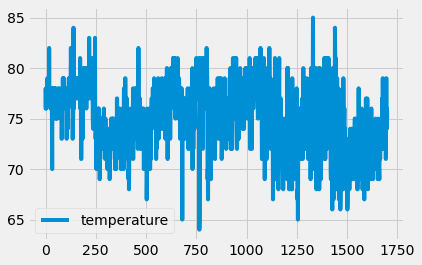

In [67]:
df.plot()

In [68]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [73]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
#all_december = dt.date(2016, 12, 1)
#all_december = dt.date(2016, 12, 1) - dt.timedelta(days=31)
#all_december = dt.date(2016, 12, 1) - dt.timedelta(month=1)
#all_december = dt.date(2016, 12, 1) - dt.date(2016, 12, 31) 
# results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= all_december).all()
# results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= all_december).filter(Measurement.date <= dt.date(2016, 12, 31)).all()

# print(results)

results = session.query(Measurement).filter(extract("month", Measurement.date) == 12)
dec_results = [temp.tobs for temp in results]
print(len(dec_results))

1517


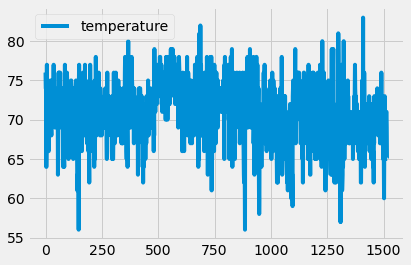

In [74]:
df.plot()

In [75]:
# 7. Convert the December temperatures to a list.
# print(df.to_string(index=False))

# df = df.sort_index()

dec_results = [temp.tobs for temp in results]

In [71]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
# df = pd.DataFrame(results, columns=['date','temperature'])
# df.set_index(df['date'], inplace=True)
# print(df)

df = pd.DataFrame(dec_results, columns=['temperature'])
print(df)

      temperature
0            76.0
1            74.0
2            74.0
3            64.0
4            64.0
...           ...
1512         71.0
1513         71.0
1514         69.0
1515         65.0
1516         65.0

[1517 rows x 1 columns]


In [72]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
